### Code in the `test_app.py`

In [ ]:
import requests
import pandas as pd
from flask import Flask, render_template
from bokeh.plotting import figure, show
from bokeh.embed import components

app = Flask(__name__)


# Bokeh tools
TOOLS = "resize,pan,wheel_zoom,box_zoom,reset,previewsave"

# Initialize the URL for dataset location
url_path = 'https://www.quandl.com/api/v3/datasets/USCENSUS/IE_7530.json?auth_token=W_c-rhUo457bjeN2xHgy'
session = requests.Session()
r = requests.get(url_path)
new_data = r.json()

column_names = new_data['dataset']['column_names']
inp_dataset = new_data['dataset']['data']
dframe = pd.DataFrame(inp_dataset, columns=column_names)
dframe = dframe.set_index('Month')
dframe.sort_index(ascending=True, inplace=True)


def make_figure():
    plot = figure(tools=TOOLS, width=750, height=450, title='United States Import/Exports',
                  x_axis_label='date', x_axis_type='datetime')

    plot.line(dframe.index, dframe.get('Exports'), color='#A6CEE3', legend='Exports')
    plot.line(dframe.index, dframe.get('Imports'), color='#33A02C', legend='Imports')
    plot.line(dframe.index, dframe.get('Balance'), color='#FB9A99', legend='Balance')

    return plot




@app.route('/')
def greet():
    greetings = 'Hello World, I am BOKEH'
    plot = make_figure()
    script, div = components(plot)

    return render_template('index.html', greetings=greetings, script=script, div=div)


if __name__ == '__main__':
    app.run(debug=True)


### Code in the `index.html`

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <!-- Load BokehJS components -->
    <script type="text/javascript" src="http://cdn.pydata.org/bokeh/release/bokeh-0.10.0.min.js"></script>

    <!-- Load BokehJS CSS -->
    <link rel="stylesheet" href="http://cdn.pydata.org/bokeh/release/bokeh-0.10.0.min.css" type="text/css" />


    <title>Hey, I'm working!</title>
</head>
<body>
   <h1>{{ greetings | safe }} </h1>

    {{ script | safe }}
    {{ div | safe }}

</body>
</html>

## Output I see

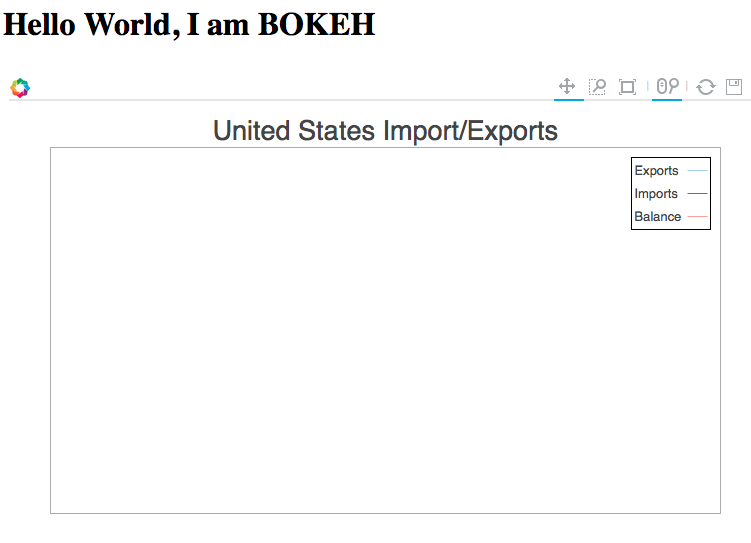

In [6]:
from IPython.display import Image
Image('./img/bokeh_output.png')

In [7]:
%pastebin "bokeh_flask_app.ipynb"

u'https://gist.github.com/c4d33ae6a6e7f1bbfce0'